In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Try using the Python engine instead of the C engine
true_data = pd.read_csv("C://Users//Nitin//Downloads//True.csv", encoding='latin-1', on_bad_lines='warn', engine='python')
fake_data = pd.read_csv("C://Users//Nitin//Downloads//Fake.csv", encoding='latin-1', on_bad_lines='warn', engine='python')

Skipping line 11067: ',' expected after '"'


In [2]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# Add labels for both datasets
true_data['label'] = 1  # Real news
fake_data['label'] = 0  # Fake news

In [5]:
df=pd.concat([true_data, fake_data])
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44897 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44897 non-null  object
 1   text     44897 non-null  object
 2   subject  44897 non-null  object
 3   date     44897 non-null  object
 4   label    44897 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [7]:
df.describe()

,label
count,44897.000000
mean,0.477003
std,0.499476
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [8]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [9]:
df.shape

(44897, 5)

In [10]:
print(f"Shape of True Dataset: {true_data.shape}")
print(f"Shape of Fake Dataset: {fake_data.shape}")

Shape of True Dataset: (21416, 5)
Shape of Fake Dataset: (23481, 5)


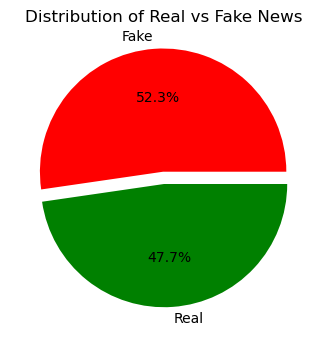

In [11]:
plt.figure(figsize=(4,4))
df['label'].value_counts().plot.pie(
    autopct='%1.1f%%',
    explode=[0.1, 0],
    labels=['Fake', 'Real'],
    colors=['red', 'green']
)
plt.title('Distribution of Real vs Fake News')
plt.ylabel('')  # Remove y-label for a cleaner pie chart
plt.show()


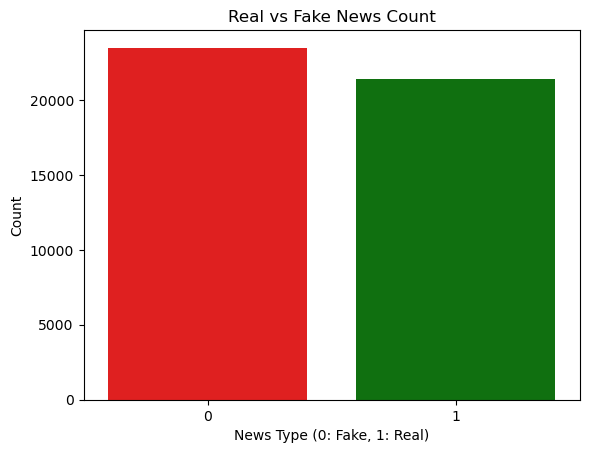

In [12]:
# Bar plot
sns.countplot(x='label', data=df, palette=['red', 'green'])
plt.title('Real vs Fake News Count')
plt.xlabel('News Type (0: Fake, 1: Real)')
plt.ylabel('Count')
plt.show()

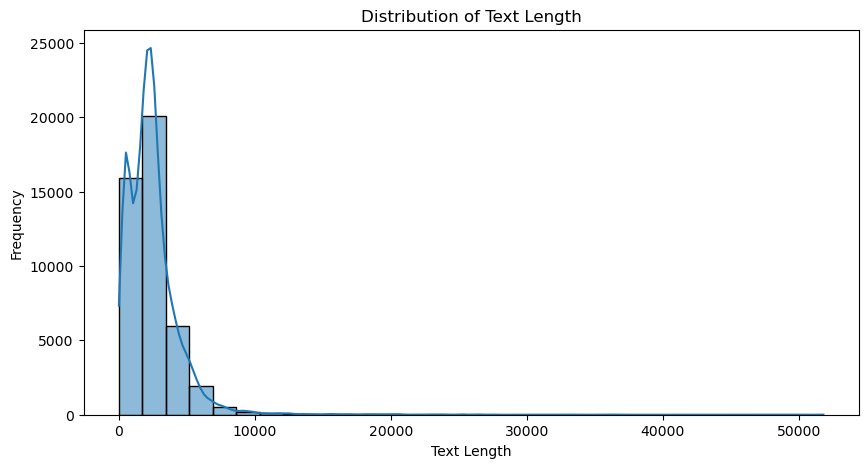

In [13]:
# Add a column for text length
df['text_length'] = df['text'].apply(len)

# Histogram of text length
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], kde=True, bins=30)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

C:\Users\Nitin\AppData\Local\Temp\ipykernel_12292\1933309093.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['label'] == 1]['text_length'], shade=True, color="green", label="Real News")
C:\Users\Nitin\AppData\Local\Temp\ipykernel_12292\1933309093.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['label'] == 0]['text_length'], shade=True, color="red", label="Fake News")


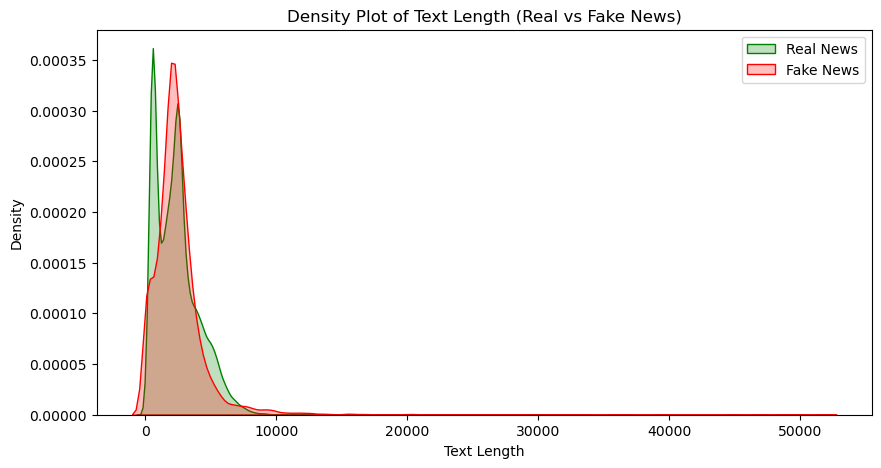

In [14]:
# Density plot for real vs fake news text length
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['label'] == 1]['text_length'], shade=True, color="green", label="Real News")
sns.kdeplot(df[df['label'] == 0]['text_length'], shade=True, color="red", label="Fake News")
plt.title('Density Plot of Text Length (Real vs Fake News)')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.legend()
plt.show()

In [15]:
# Function to create a word cloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, max_font_size=50).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [16]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


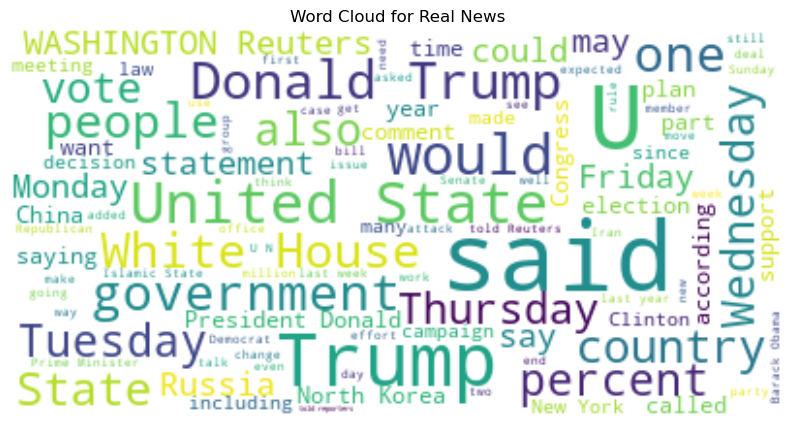

In [17]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Word Cloud for Real News
real_text = ' '.join(df[df['label'] == 1]['text'])
create_wordcloud(real_text, 'Word Cloud for Real News')

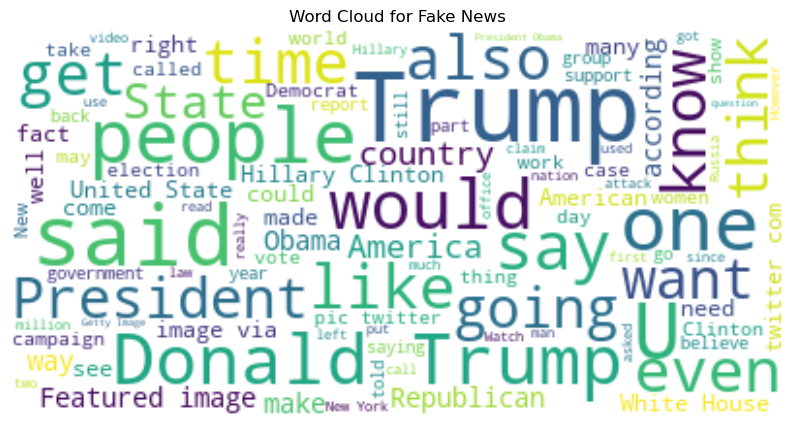

In [18]:
# Word Cloud for Fake News
fake_text = ' '.join(df[df['label'] == 0]['text'])
create_wordcloud(fake_text, 'Word Cloud for Fake News')

In [19]:
# Preprocessing the Data:

In [20]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation and numbers
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply preprocessing to both datasets
true_data['clean_text'] = true_data['text'].apply(preprocess_text)
fake_data['clean_text'] = fake_data['text'].apply(preprocess_text)

# Check results
print(true_data[['text', 'clean_text']].head())
print(fake_data[['text', 'clean_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  WASHINGTON (Reuters) - The head of a conservat...   
1  WASHINGTON (Reuters) - Transgender people will...   
2  WASHINGTON (Reuters) - The special counsel inv...   
3  WASHINGTON (Reuters) - Trump campaign adviser ...   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...   

                                          clean_text  
0  washington reuters head conservative republica...  
1  washington reuters transgender people allowed ...  
2  washington reuters special counsel investigati...  
3  washington reuters trump campaign adviser geor...  
4  seattlewashington reuters president donald tru...  
                                                text  \
0  Donald Trump just couldn t wish all Americans ...   
1  House Intelligence Committee Chairman Devin Nu...   
2  On Friday, it was revealed that former Milwauk...   
3  On Christmas day, Donald Trump announced that ...   
4  Pope Francis used his annual Christmas Day mes... 

In [21]:
true_data.head()

,title,text,subject,date,label,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,seattlewashington reuters president donald tru...


In [22]:
# This is the final dataframe with preprocessed text data on the  'clean_text' column:
fdf=pd.concat([true_data, fake_data])
fdf.head()

,title,text,subject,date,label,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,seattlewashington reuters president donald tru...


In [23]:
# Sentiment Analysis:

In [24]:
# vader:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon (if not already done)
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get VADER sentiment scores
def get_vader_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # Compound score is the overall sentiment

# Apply sentiment analysis to the 'clean_text' column in the merged dataset
fdf['vader_sentiment'] = fdf['clean_text'].apply(get_vader_sentiment)

# Check the sentiment analysis results
print(fdf[['clean_text', 'vader_sentiment']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                          clean_text  vader_sentiment
0  washington reuters head conservative republica...           0.9831
1  washington reuters transgender people allowed ...           0.9578
2  washington reuters special counsel investigati...           0.5719
3  washington reuters trump campaign adviser geor...          -0.1761
4  seattlewashington reuters president donald tru...           0.9670


In [25]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [26]:
from textblob import TextBlob

# Function to get TextBlob sentiment score
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply TextBlob sentiment analysis to the 'clean_text' column in the merged dataset
fdf['textblob_sentiment'] = fdf['clean_text'].apply(get_textblob_sentiment)

# Check the sentiment analysis results
print(fdf[['clean_text', 'textblob_sentiment']].head())


                                          clean_text  textblob_sentiment
0  washington reuters head conservative republica...            0.036979
1  washington reuters transgender people allowed ...            0.113095
2  washington reuters special counsel investigati...            0.129766
3  washington reuters trump campaign adviser geor...            0.030305
4  seattlewashington reuters president donald tru...            0.028796


In [27]:
# VADER: The compound score gives an overall sentiment from -1 (negative) to 1 (positive). You can use this score to categorize the sentiment as positive,
# neutral, or negative.
# TextBlob: The polarity score also ranges from -1 to 1, indicating how positive or negative the text is.

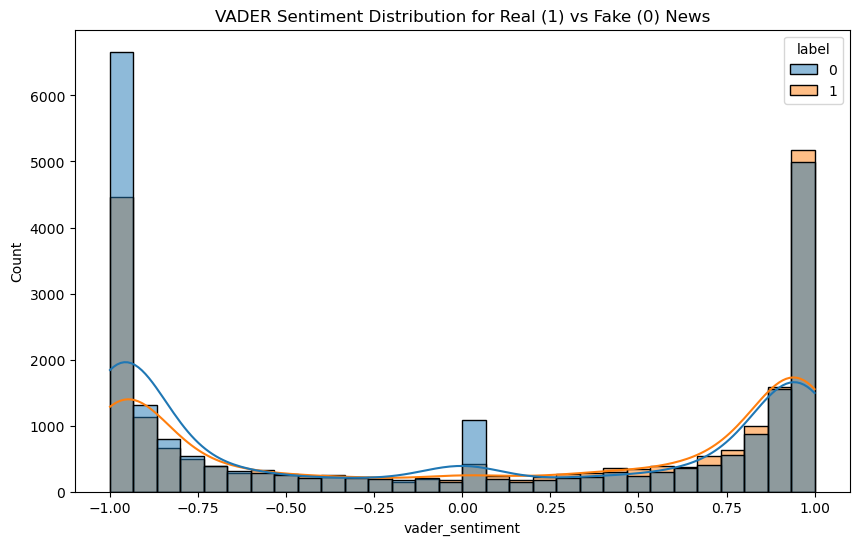

In [28]:
# Visualization:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of VADER sentiment scores for real and fake news
plt.figure(figsize=(10,6))
sns.histplot(data=fdf, x='vader_sentiment', hue='label', bins=30, kde=True)
plt.title('VADER Sentiment Distribution for Real (1) vs Fake (0) News')
plt.show()


In [29]:
# Insight for the above Visualization:
# Fake news tends to be emotionally negative or neutral at some times. We can see in the graph that most of the fake news score a negative sentiment score.
# True news mostly are mostly positive emotions compared to the fake news. We can see that the true news have a more postive spread in the graph.
# However there are more fake news than true news in the neutral side.

In [30]:
# N-Gram analysis:

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Define a function to extract n-grams
def get_top_ngrams(corpus, ngram_range=(1, 1), n=None):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top unigrams (1-grams), bigrams (2-grams), and trigrams (3-grams)
top_unigrams = get_top_ngrams(fdf['clean_text'], ngram_range=(1, 1), n=20)
top_bigrams = get_top_ngrams(fdf['clean_text'], ngram_range=(2, 2), n=20)
top_trigrams = get_top_ngrams(fdf['clean_text'], ngram_range=(3, 3), n=20)

# Convert to DataFrame for visualization
unigram_df = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency'])
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])
trigram_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

# Show the results
print("Top Unigrams:\n", unigram_df)
print("\nTop Bigrams:\n", bigram_df)
print("\nTop Trigrams:\n", trigram_df)


Top Unigrams:
        Unigram  Frequency
0         said     130054
1        trump     116525
2    president      51134
3       people      41079
4        state      31282
5          new      30942
6      reuters      28767
7       donald      27659
8       states      27111
9        house      26962
10  government      26564
11     clinton      25865
12       obama      24874
13  republican      24281
14      united      23540
15        told      23344
16       white      22219
17        like      22137
18    campaign      20992
19        news      20120

Top Bigrams:
                 Bigram  Frequency
0         donald trump      23304
1        united states      18357
2          white house      14585
3      hillary clinton       8919
4             new york       8523
5     president donald       6938
6   washington reuters       6488
7          north korea       6127
8           trump said       4944
9       prime minister       4685
10        barack obama       4599
11      said sta

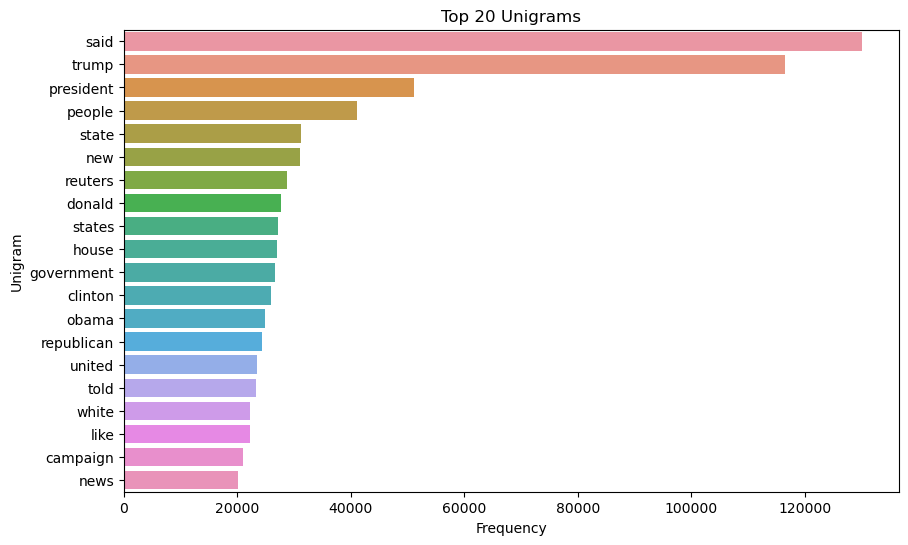

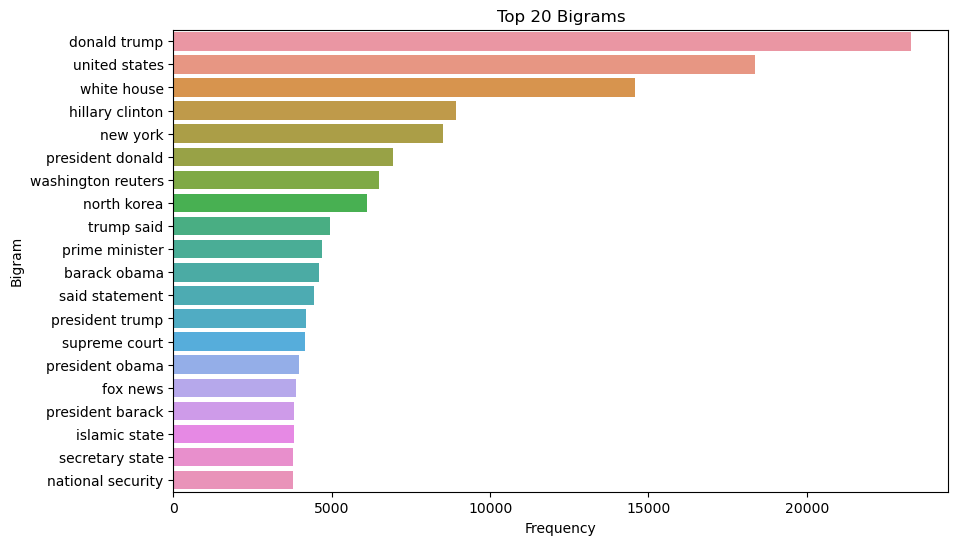

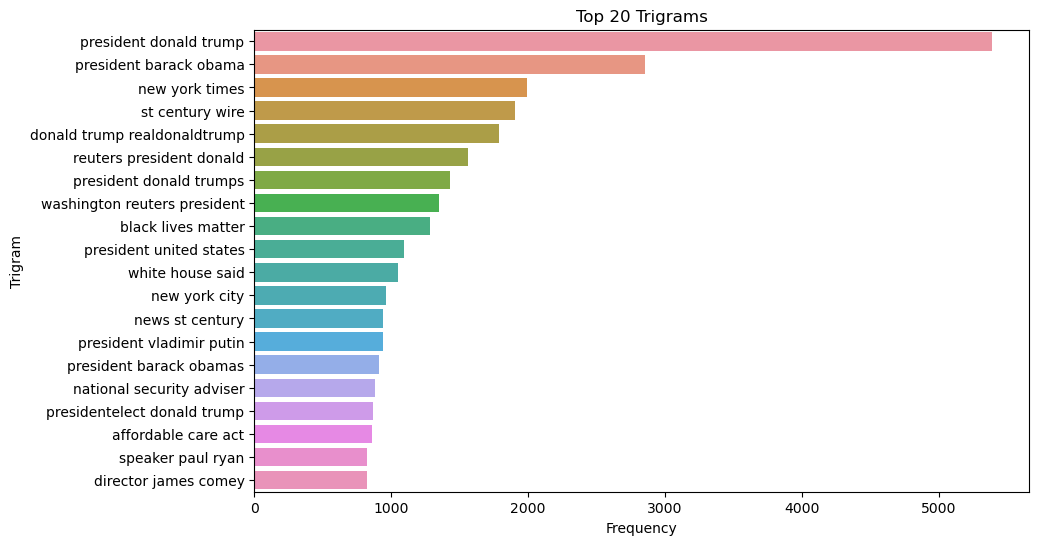

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the top unigrams
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Unigram', data=unigram_df)
plt.title('Top 20 Unigrams')
plt.show()

# Plot the top bigrams
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Bigram', data=bigram_df)
plt.title('Top 20 Bigrams')
plt.show()

# Plot the top trigrams
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Trigram', data=trigram_df)
plt.title('Top 20 Trigrams')
plt.show()


In [33]:
# # Model Building:
# Steps for Model Building:
# Data Preparation for Modeling:

# Features:
# Use the results of your text processing (TF-IDF, word embeddings, etc.), sentiment scores, and n-grams as features.
# Labels: Your label column (label) will indicate whether the news is fake (0) or real (1).
# Train-Test Split:

# # Split your data into training and testing sets to evaluate the model performance.

In [34]:
fdf.head()

,title,text,subject,date,label,clean_text,vader_sentiment,textblob_sentiment
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,washington reuters head conservative republica...,0.9831,0.036979
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,washington reuters transgender people allowed ...,0.9578,0.113095
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,washington reuters special counsel investigati...,0.5719,0.129766
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,washington reuters trump campaign adviser geor...,-0.1761,0.030305
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,seattlewashington reuters president donald tru...,0.9670,0.028796


In [35]:
# This code is used to convert the text into vectors aka numerical form:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

# Fit and transform the 'clean_text' column (this will create a numerical representation of the text)
X_tfidf = tfidf_vectorizer.fit_transform(fdf['clean_text'])

# Check the shape of the resulting TF-IDF matrix (number of rows = number of articles, columns = features)
print("TF-IDF matrix shape:", X_tfidf.shape)


TF-IDF matrix shape: (44897, 5000)


In [36]:
# This code is to add vader_sentiment as a feature to the model for better prediction accuracy:
import numpy as np
from scipy.sparse import hstack
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'vader_sentiment' is already present in your merged_df
vader_sentiment = fdf['vader_sentiment'].values.reshape(-1, 1)  # Reshape for concatenation

# Convert vader_sentiment to a sparse matrix
from scipy.sparse import csr_matrix
vader_sentiment_sparse = csr_matrix(vader_sentiment)

# Combine TF-IDF features and vader_sentiment
X_combined = hstack([X_tfidf, vader_sentiment_sparse])

# Check the shape of the resulting combined feature matrix
print("Combined feature matrix shape:", X_combined.shape)

# Labels (fake news = 0, real news = 1)
y = fdf['label']

# Now you can split the combined features into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Combined feature matrix shape: (44897, 5001)
Training set size: (35917, 5001)
Test set size: (8980, 5001)


In [37]:
# Applying the models:

In [38]:
# 1. Logistic Regression:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.9905345211581291
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4644
           1       0.99      0.99      0.99      4336

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [39]:
# 2. Random Forest:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9981069042316258
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4644
           1       1.00      1.00      1.00      4336

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [40]:
# Summary of the Code:
# Logistic Regression: Initializes and trains a logistic regression model, predicts the test data, and evaluates using accuracy and classification report
# (which includes precision, recall, and F1-score).
# Random Forest: Uses an ensemble of decision trees to make predictions, generally providing good accuracy and robustness.
# Evaluation Metrics:
# Accuracy: The proportion of true results among the total number of cases examined.
# Precision: The ratio of correctly predicted positive observations to the total predicted positives.
# Recall: The ratio of correctly predicted positive observations to all actual positives.
# F1-Score: The weighted average of Precision and Recall, useful for imbalanced classes.

# LSTM-CNN Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error


In [42]:
# Prepare features and labels
X = df['text'].values  # News content
y = df['label'].values  # Labels: 1 for fake, 0 for true

In [43]:
# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Tokenize and pad sequences
max_features = 5000  # Number of words to consider
max_sequence_len = 300  # Padding length

In [45]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [46]:
# Pad sequences to ensure uniform length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_len)

In [47]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [52]:
pip install tensorflow



  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1


In [53]:
# Build the LSTM-CNN model
from tensorflow.keras.models import Sequential
def build_lstm_cnn_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_sequence_len))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=4))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [54]:
# Train and evaluate the LSTM-CNN model
lstm_cnn_model = build_lstm_cnn_model()
lstm_cnn_model.fit(X_train_pad, y_train, batch_size=64, validation_data=(X_test_pad, y_test))

C:\Users\Nitin\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


562/562 ━━━━━━━━━━━━━━━━━━━━ 322s 548ms/step - accuracy: 0.9067 - loss: 0.1979 - val_accuracy: 0.9933 - val_loss: 0.0274


In [55]:
# Evaluate LSTM-CNN Model
y_pred_lstm_cnn = (lstm_cnn_model.predict(X_test_pad) > 0.5).astype("int32")
lstm_cnn_accuracy = accuracy_score(y_test, y_pred_lstm_cnn)
mse = mean_squared_error(y_test, y_pred_lstm_cnn)
rmse = np.sqrt(mse)
print(f"LSTM-CNN Model Accuracy: {lstm_cnn_accuracy}")
print(f"LSTM-CNN Model MSE: {mse}")
print(f"LSTM-CNN Model RMSE: {rmse}")
print(classification_report(y_test, y_pred_lstm_cnn))

281/281 ━━━━━━━━━━━━━━━━━━━━ 23s 79ms/step
LSTM-CNN Model Accuracy: 0.9933184855233853
LSTM-CNN Model MSE: 0.0066815144766146995
LSTM-CNN Model RMSE: 0.08174053141871968
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4644
           1       0.99      0.99      0.99      4336

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# COMPARISON

                 Model  Accuracy  Precision (0)  Recall (0)  F1-Score (0)  \
0        Random Forest    0.9981           1.00        1.00          1.00   
1  Logistic Regression    0.9905           0.99        0.99          0.99   
2             LSTM-CNN    0.9913           1.00        0.99          0.99   

   Precision (1)  Recall (1)  F1-Score (1)  
0           1.00        1.00          1.00  
1           0.99        0.99          0.99  
2           0.99        1.00          0.99  


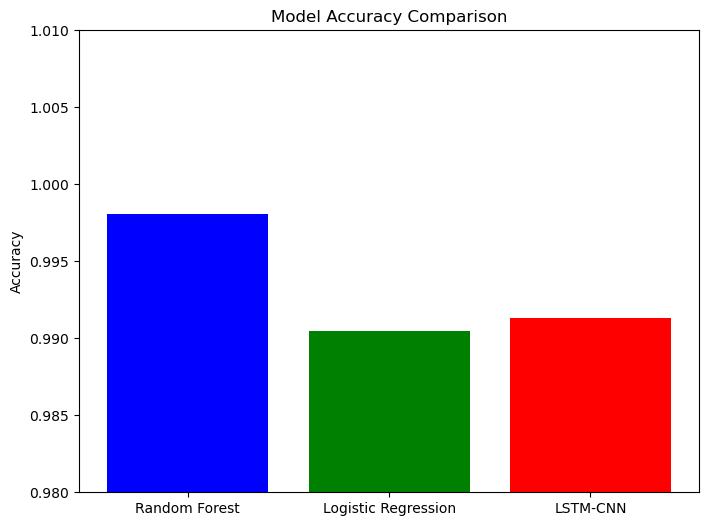

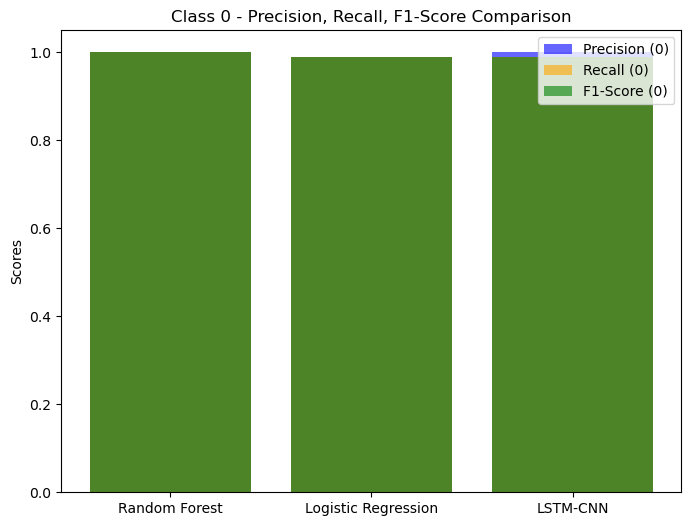

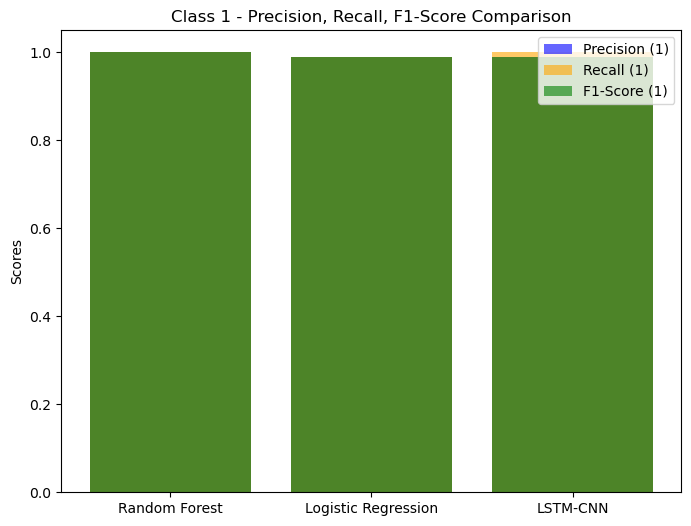

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for each model's performance metrics
data = {
    'Model': ['Random Forest', 'Logistic Regression', 'LSTM-CNN'],
    'Accuracy': [0.9981, 0.9905, 0.9913],
    'Precision (0)': [1.00, 0.99, 1.00],
    'Recall (0)': [1.00, 0.99, 0.99],
    'F1-Score (0)': [1.00, 0.99, 0.99],
    'Precision (1)': [1.00, 0.99, 0.99],
    'Recall (1)': [1.00, 0.99, 1.00],
    'F1-Score (1)': [1.00, 0.99, 0.99]
}

# Creating a DataFrame for better visualization
df = pd.DataFrame(data)

# Print the DataFrame for tabular comparison
print(df)

# Plotting the accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(df['Model'], df['Accuracy'], color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.98, 1.01)  # Set the limits for better visualization
plt.show()

# Plotting precision, recall, and F1-Score for Class 0
plt.figure(figsize=(8, 6))
plt.bar(df['Model'], df['Precision (0)'], color='blue', alpha=0.6, label='Precision (0)')
plt.bar(df['Model'], df['Recall (0)'], color='orange', alpha=0.6, label='Recall (0)')
plt.bar(df['Model'], df['F1-Score (0)'], color='green', alpha=0.6, label='F1-Score (0)')
plt.title('Class 0 - Precision, Recall, F1-Score Comparison')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Plotting precision, recall, and F1-Score for Class 1
plt.figure(figsize=(8, 6))
plt.bar(df['Model'], df['Precision (1)'], color='blue', alpha=0.6, label='Precision (1)')
plt.bar(df['Model'], df['Recall (1)'], color='orange', alpha=0.6, label='Recall (1)')
plt.bar(df['Model'], df['F1-Score (1)'], color='green', alpha=0.6, label='F1-Score (1)')
plt.title('Class 1 - Precision, Recall, F1-Score Comparison')
plt.ylabel('Scores')
plt.legend()
plt.show()


# The Random Forest model gives the best results with the highest accuracy (99.81%) and performs very well in predicting both classes. Logistic Regression is slightly less accurate but still does a good job. The LSTM-CNN model has a similar accuracy but shows a bit higher error values.

In [57]:
import pickle

In [58]:
# Specify the model to save
filename = 'trained_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [59]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [60]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample code to save the TFIDF vectorizer
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
# Fit and transform the 'clean_text' column (this will create a numerical representation of the text)
X_tfidf = tfidf_vectorizer.fit_transform(fdf['clean_text'])
# Save the vectorizer
with open('tfidf_vectorizer.save', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

In [61]:
from joblib import dump
dump(rf_model, 'model_filename.joblib')


['model_filename.joblib']

In [62]:
from joblib import load
model1 = load('model_filename.joblib')


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

# Fit and transform the 'clean_text' column (this will create a numerical representation of the text)
X_tfidf = tfidf_vectorizer.fit_transform(fdf['clean_text'])

# Save the vectorizer using joblib
dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

print("TF-IDF vectorizer saved successfully as 'tfidf_vectorizer.joblib'")


TF-IDF vectorizer saved successfully as 'tfidf_vectorizer.joblib'


In [64]:
import sklearn
print("scikit-learn version used for training:", sklearn.__version__)


scikit-learn version used for training: 1.2.2
